In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
np.expand_dims??

Signature: np.expand_dims(a, axis)
Source:   
@array_function_dispatch(_expand_dims_dispatcher)
def expand_dims(a, axis):
    """
    Expand the shape of an array.

    Insert a new axis that will appear at the `axis` position in the expanded
    array shape.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int or tuple of ints
        Position in the expanded axes where the new axis (or axes) is placed.

        .. deprecated:: 1.13.0
            Passing an axis where ``axis > a.ndim`` will be treated as
            ``axis == a.ndim``, and passing ``axis < -a.ndim - 1`` will
            be treated as ``axis == 0``. This behavior is deprecated.

        .. versionchanged:: 1.18.0
            A tuple of axes is now supported.  Out of range axes as
            described above are now forbidden and raise an `AxisError`.

    Returns
    -------
    result : ndarray
        View of `a` with the number of dimensions increased.

    See Also
    --------
    

In [4]:
os.path.join('C:\\Users\\mudit\\Downloads\\Toxic comment dataset\\kaggle dataset\\train\\dd2.csv')

'C:\\Users\\mudit\\Downloads\\Toxic comment dataset\\kaggle dataset\\train\\dd2.csv'

In [5]:
df = pd.read_csv(os.path.join('C:\\Users\\mudit\\Downloads\\Toxic comment dataset\\kaggle dataset\\train\\dd2.csv'))

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1856,05049addf5d0052b,"I was not talking about monetary fine, I meant...",0,0,0,0,0,0
1857,0504b8ec93b3521d,"(whether it was gambling on mortgages, which w...",0,0,0,0,0,0
1858,0506d1ab242e68b7,"""\n\n December 2008 \n You currently appear to...",0,0,0,0,0,0
1859,0507f96d22235669,(T | C) \n\n Owned \n\n (T | C),0,0,0,0,0,0
1860,0508396f5a861678,"""\nI didn't realize discussion was required to...",0,0,0,0,0,0


In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [10]:
MAX_FEATURES = 200000 

In [11]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [12]:
vectorizer.adapt(X.values)

In [13]:
vectorized_text = vectorizer(X.values)

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1900)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [15]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.3))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [17]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [18]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [36]:
history = model.fit(train, epochs=100, validation_data=val)

Epoch 1/100
81/81 [==============================] - 64s 744ms/step - loss: 0.2427 - val_loss: 0.1492
Epoch 2/100
81/81 [==============================] - 61s 756ms/step - loss: 0.1405 - val_loss: 0.0937
Epoch 3/100
81/81 [==============================] - 63s 773ms/step - loss: 0.0850 - val_loss: 0.0716
Epoch 4/100
81/81 [==============================] - 61s 759ms/step - loss: 0.0604 - val_loss: 0.0401
Epoch 5/100
81/81 [==============================] - 62s 764ms/step - loss: 0.0453 - val_loss: 0.0376
Epoch 6/100
81/81 [==============================] - 64s 788ms/step - loss: 0.0383 - val_loss: 0.0344
Epoch 7/100
81/81 [==============================] - 63s 782ms/step - loss: 0.0348 - val_loss: 0.0246
Epoch 8/100
81/81 [==============================] - 64s 794ms/step - loss: 0.0340 - val_loss: 0.0347
Epoch 9/100
81/81 [==============================] - 64s 792ms/step - loss: 0.0286 - val_loss: 0.0245
Epoch 10/100
81/81 [==============================] - 64s 796ms/step - loss: 0.028

KeyboardInterrupt: 

In [36]:
history.history

{'loss': [0.036505747586488724,
  0.03658880665898323,
  0.03210810571908951,
  0.025029568001627922,
  0.02403194084763527,
  0.024435032159090042,
  0.02357265166938305,
  0.027700576931238174,
  0.029411423951387405,
  0.026138732209801674,
  0.027645597234368324,
  0.024709494784474373,
  0.02621304616332054,
  0.021688440814614296,
  0.020576853305101395,
  0.020794978365302086,
  0.019449377432465553,
  0.01776663400232792,
  0.017987480387091637,
  0.021081719547510147,
  0.014179154299199581,
  0.01728948764503002,
  0.015671387314796448,
  0.013936051167547703,
  0.012686419300734997,
  0.013526076450943947,
  0.014346723444759846,
  0.013461866416037083,
  0.011998502537608147,
  0.014247514307498932,
  0.012102851644158363,
  0.013959354721009731,
  0.01391777116805315,
  0.01084438618272543,
  0.009643069468438625,
  0.010883154347538948,
  0.009051615372300148,
  0.0067850081250071526,
  0.005864551756531,
  0.005320269614458084,
  0.006246717646718025,
  0.005434077233076

In [37]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

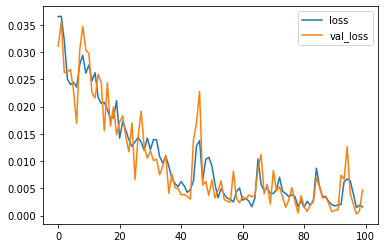

In [38]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [20]:
input_text = vectorizer(' I am going to hit you.')


In [21]:
model.predict(np.array([input_text]))

1/1 [==============================] - 1s 914ms/step


array([[0.49904203, 0.5000908 , 0.50367314, 0.49675983, 0.49933562,
        0.50185037]], dtype=float32)

In [22]:
res = model.predict(np.array([input_text]))

1/1 [==============================] - 0s 85ms/step


In [23]:
(res > 0.5).astype(int)

array([[0, 1, 1, 0, 0, 1]])

In [24]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [25]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 182ms/step


array([[1, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1]])

In [26]:
res.shape

(1, 6)

In [27]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X_true, y_true = batch
    yhat = model.predict(X_true)
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 106ms/step


In [30]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.03885480388998985, Recall:0.41304346919059753, Accuracy:0.0


In [31]:
model.save('toxic_comment6.h5')

In [34]:
model =tf.keras.models.load_model('toxic_comment6.h5')

In [35]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.03885480388998985, Recall:0.41304346919059753, Accuracy:0.0


In [27]:
F1 = 2 * ((pre.result().numpy() )*(re.result().numpy()) ) / ((pre.result().numpy() )+(re.result().numpy()) )

In [28]:
F1

1.0

In [29]:
input_str = vectorizer('i will kill you')

In [30]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 73ms/step


In [31]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [32]:
res

array([[9.9774623e-01, 4.5147580e-03, 8.7186581e-01, 9.6186617e-04,
        1.2151101e-02, 3.2549330e-03]], dtype=float32)

In [33]:
!pip install gradio jinja2

In [34]:
import gradio as gr

In [35]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [36]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\mudit\anaconda3\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\mudit\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\mudit\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\mudit\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.9, however version 3.14.0 is available, please upgrade.
--------


In [37]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://11b84a37831518ea.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x19bda3878b0>,
 'http://127.0.0.1:7860/',
 'https://11b84a37831518ea.gradio.app')

1/1 [==============================] - 0s 72ms/step
